Importing the necessary package 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import os
from factor_analyzer import Rotator
import seaborn as sns
import json
import geojson
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import plotly.io as pio

# Probability of failure & Risk

In [3]:
SVCI=pd.read_csv('SVCI-Aggr.csv')
SVCI

,Unnamed: 0,fid,cat,OBJECTID,GlobalID,FACILITYID,INSTALLDAT,MATERIAL,DIAMETER,WATERTYPE,...,SHAPE_STLe,length,length-spl,DAUID,ECI,lon,lat,SVI,EVI,SVCI
0,66986,41157,39206,1611172,{866E74CD-B512-4E19-8113-84434A82E496},383958,19750101.0,SP,1800.0,NaN,...,558.85,558.85,120.00,59153394.0,75.14,-123.14,49.29,47.31,99.97,100.00
1,66983,41159,39206,1611172,{866E74CD-B512-4E19-8113-84434A82E496},383958,19750101.0,SP,1800.0,NaN,...,558.85,558.85,120.00,59153394.0,75.14,-123.14,49.29,47.31,99.97,100.00
2,66982,41158,39206,1611172,{866E74CD-B512-4E19-8113-84434A82E496},383958,19750101.0,SP,1800.0,NaN,...,558.85,558.85,120.00,59153394.0,75.14,-123.14,49.29,47.31,99.97,100.00
3,69613,41160,39206,1611172,{866E74CD-B512-4E19-8113-84434A82E496},383958,19750101.0,SP,1800.0,NaN,...,558.85,558.85,120.00,59153586.0,75.14,-123.14,49.29,47.51,99.44,99.85
4,69621,41161,39206,1611172,{866E74CD-B512-4E19-8113-84434A82E496},383958,19750101.0,SP,1800.0,NaN,...,558.85,558.85,78.85,59153586.0,75.14,-123.14,49.29,47.51,99.44,99.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,74010,21544,20548,1667730,{5BDBD358-C2F8-4D7E-9FD2-462294BC83F3},4305360,19470101.0,CAS,200.0,NaN,...,0.80,0.80,0.80,59154026.0,0.01,-123.11,49.28,NaN,0.00,0.00
79849,73995,41892,39909,1605318,{3468468B-602C-4A3B-BEB1-8683AF0866F0},409993,20060505.0,DICL,200.0,NaN,...,0.67,0.67,0.67,59154026.0,0.01,-123.11,49.28,NaN,0.00,0.00
79850,74011,15424,14691,1667729,{445DAD7B-FBB6-4B42-A02A-3276BC87446F},4305343,19470101.0,CAS,200.0,NaN,...,0.22,0.22,0.22,59154026.0,0.00,-123.11,49.28,NaN,0.00,0.00
79851,74018,15694,14949,1616331,{B16C95F9-C33D-4EC6-8960-334ABB852D19},4134554,20101125.0,DICL,200.0,NaN,...,0.20,0.20,0.20,59154026.0,0.00,-123.11,49.28,NaN,0.00,0.00


In [4]:
SVCI['INSTALLDAT'] = SVCI['INSTALLDAT'].fillna(0).astype(int)
SVCI['INSTALLYEAR'] = SVCI['INSTALLDAT'].apply(lambda x: int(str(x)[:4]))

# Calculate AGE column by subtracting INSTALLYEAR from 2023
current_year = 2023
SVCI['AGE'] = current_year - SVCI['INSTALLYEAR']
SVCI['AGE'] = np.where(SVCI['INSTALLYEAR'] == 0, 0, SVCI['AGE'])

selected_columns = ['OBJECTID', 'DAUID', 'INSTALLDAT', 'INSTALLYEAR', 'AGE', 'SVI', 'EVI','ECI', 'SVCI']
selected_df = SVCI[selected_columns]

selected_df

,OBJECTID,DAUID,INSTALLDAT,INSTALLYEAR,AGE,SVI,EVI,ECI,SVCI
0,1611172,59153394.0,19750101,1975,48,47.31,99.97,75.14,100.00
1,1611172,59153394.0,19750101,1975,48,47.31,99.97,75.14,100.00
2,1611172,59153394.0,19750101,1975,48,47.31,99.97,75.14,100.00
3,1611172,59153586.0,19750101,1975,48,47.51,99.44,75.14,99.85
4,1611172,59153586.0,19750101,1975,48,47.51,99.44,75.14,99.85
...,...,...,...,...,...,...,...,...,...
79848,1667730,59154026.0,19470101,1947,76,NaN,0.00,0.01,0.00
79849,1605318,59154026.0,20060505,2006,17,NaN,0.00,0.01,0.00
79850,1667729,59154026.0,19470101,1947,76,NaN,0.00,0.00,0.00
79851,1616331,59154026.0,20101125,2010,13,NaN,0.00,0.00,0.00


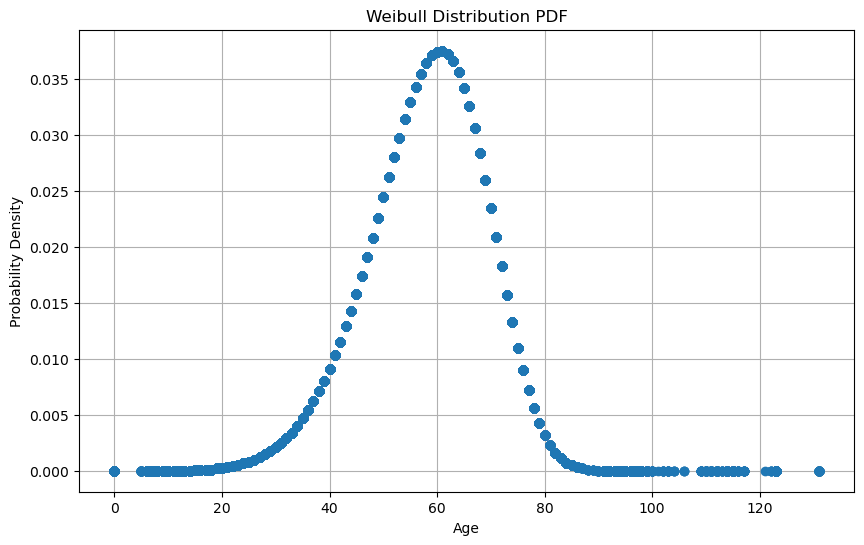

,OBJECTID,DAUID,INSTALLDAT,INSTALLYEAR,AGE,SVCI,SVI,EVI,ECI,Probability of failure (PDF)
0,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,2.08
1,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,2.08
2,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,2.08
3,1611172,59153586.0,19750101,1975,48,99.85,47.51,99.44,75.14,2.08
4,1611172,59153586.0,19750101,1975,48,99.85,47.51,99.44,75.14,2.08
...,...,...,...,...,...,...,...,...,...,...
79848,1667730,59154026.0,19470101,1947,76,0.00,NaN,0.00,0.01,0.90
79849,1605318,59154026.0,20060505,2006,17,0.00,NaN,0.00,0.01,0.01
79850,1667729,59154026.0,19470101,1947,76,0.00,NaN,0.00,0.00,0.90
79851,1616331,59154026.0,20101125,2010,13,0.00,NaN,0.00,0.00,0.00


In [5]:
shape_factor = 6.273
scale_factor = 62.364

# Calculate probability density function (PDF) of Weibull distribution
SVCI['Probability of failure (PDF)'] = weibull_min.pdf(SVCI['AGE'], c=shape_factor, scale=scale_factor) * 100
SVCI['Probability of failure (PDF)'] = SVCI['Probability of failure (PDF)'].round(2)

# Plot the Weibull PDF with PDF values expressed in percentage (divide by 100)
plt.figure(figsize=(10, 6))
plt.plot(SVCI['AGE'], SVCI['Probability of failure (PDF)'] / 100, marker='o', linestyle='none')  
plt.title('Weibull Distribution PDF')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

selected_columns = ['OBJECTID', 'DAUID', 'INSTALLDAT', 'INSTALLYEAR', 'AGE', 'SVCI','SVI', 'EVI','ECI', 'Probability of failure (PDF)']
selected_df = SVCI[selected_columns]

selected_df

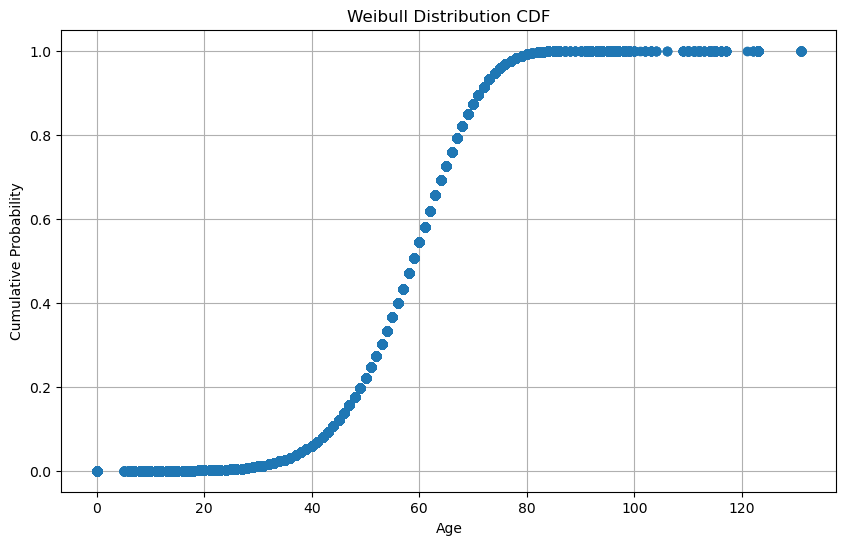

,OBJECTID,DAUID,INSTALLDAT,INSTALLYEAR,AGE,SVCI,SVI,EVI,ECI,Probability of failure (CDF)
0,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,17.60
1,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,17.60
2,1611172,59153394.0,19750101,1975,48,100.00,47.31,99.97,75.14,17.60
3,1611172,59153586.0,19750101,1975,48,99.85,47.51,99.44,75.14,17.60
4,1611172,59153586.0,19750101,1975,48,99.85,47.51,99.44,75.14,17.60
...,...,...,...,...,...,...,...,...,...,...
79848,1667730,59154026.0,19470101,1947,76,0.00,NaN,0.00,0.01,96.85
79849,1605318,59154026.0,20060505,2006,17,0.00,NaN,0.00,0.01,0.03
79850,1667729,59154026.0,19470101,1947,76,0.00,NaN,0.00,0.00,96.85
79851,1616331,59154026.0,20101125,2010,13,0.00,NaN,0.00,0.00,0.01


In [6]:
shape_factor = 6.273
scale_factor = 62.364

# Calculate cumulative distribution function (CDF) of Weibull distribution
SVCI['Probability of failure (CDF)'] = weibull_min.cdf(SVCI['AGE'], c=shape_factor, scale=scale_factor) * 100
SVCI['Probability of failure (CDF)'] = SVCI['Probability of failure (CDF)'].round(2)

# Plot the Weibull CDF
plt.figure(figsize=(10, 6))
plt.plot(SVCI['AGE'], SVCI['Probability of failure (CDF)'] / 100, marker='o', linestyle='none')  
plt.title('Weibull Distribution CDF')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

selected_columns = ['OBJECTID', 'DAUID', 'INSTALLDAT', 'INSTALLYEAR', 'AGE', 'SVCI','SVI', 'EVI','ECI', 'Probability of failure (CDF)']
selected_df = SVCI[selected_columns]

selected_df

In [8]:
# Calculate 'Risk' column
SVCI['Risk'] = SVCI['Probability of failure (CDF)'] * SVCI['SVCI']

# Use MinMaxScaler to scale 'Risk' column to a range between 0 and 100
scaler = MinMaxScaler(feature_range=(0, 100))
SVCI['Risk'] = scaler.fit_transform(SVCI[['Risk']]).round(2)
SVCI.sort_values(by='Risk', ascending=False, inplace=True)

# Select only the desired columns
selected_columns = ['OBJECTID', 'DAUID', 'INSTALLDAT', 'INSTALLYEAR', 'AGE', 'length-spl','DIAMETER', 'Probability of failure (CDF)', 'SVCI','SVI', 'EVI','ECI', 'Risk']
selected_df = SVCI[selected_columns]

selected_df

,OBJECTID,DAUID,INSTALLDAT,INSTALLYEAR,AGE,length-spl,DIAMETER,Probability of failure (CDF),SVCI,SVI,EVI,ECI,Risk
5,1613785,59153586.0,19390101,1939,84,54.48,1500.0,99.85,78.64,47.51,99.44,27.97,100.00
9,1613285,59153586.0,19390101,1939,84,31.42,1500.0,99.85,73.32,47.51,99.44,16.13,93.23
10,1613858,59153586.0,19130101,1913,110,120.00,650.0,100.00,71.81,47.51,99.44,12.77,91.45
11,1613858,59153586.0,19130101,1913,110,3.06,650.0,100.00,71.81,47.51,99.44,12.77,91.45
13,1613502,59153586.0,19390101,1939,84,21.03,1500.0,99.85,70.92,47.51,99.44,10.80,90.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,1604880,59154190.0,20090504,2009,14,30.57,200.0,0.01,26.16,57.64,0.00,0.54,0.00
30654,1662844,59150985.0,20120322,2012,11,10.52,300.0,0.00,26.16,57.83,0.00,0.35,0.00
30656,1621330,59150738.0,0,0,0,5.80,150.0,0.00,26.16,58.11,0.00,0.07,0.00
30665,1596480,59150738.0,0,0,0,5.75,150.0,0.00,26.16,58.11,0.00,0.07,0.00


In [9]:
#selected_df.to_csv('Risk_framework-120M.csv')